In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from matplotlib.lines import Line2D

%matplotlib inline  
sns.set_palette("hls", 8)

In [15]:
domain_mapping = {418:'ksta', 1677:'tagesspiegel', 35774:'sport1', 694:'gulli', }

In [50]:
results = pd.read_csv('results/decay_pt2', delimiter=',', header=None, names=['ranker', 'day', 'domain','correct','total', 'precision', 'recall','cg','avggain'])
domains = results['domain']
domains = domains.unique()
domains = domains.tolist()
domains.remove(3336)
domains.remove(2522)
domains.remove(596)
domains.remove(13554)

rankers = results['ranker']
rankers = rankers.unique()

In [36]:
results = results.fillna(0)

In [37]:
domains

[35774, 418, 1677, 694]

In [38]:
results

,ranker,day,domain,correct,total,precision,recall,cg,avggain
0,pop click only,1,35774,14417,60688,0.237559,0.079585,46.205395,0.003205
1,pop click only,1,2522,0,0,0.000000,0.000000,0.000000,0.000000
2,pop click only,1,3336,0,2,0.000000,0.000000,0.000000,0.000000
3,pop click only,1,13554,0,0,0.000000,0.000000,0.000000,0.000000
4,pop click only,1,418,108,8673,0.012452,0.050179,27.097747,0.250905
5,pop click only,1,1677,10809,26287,0.411192,0.033186,42.636355,0.003945
6,pop click only,1,694,18,546,0.032967,0.160000,10.629325,0.590518
7,pop click only,1,596,0,0,0.000000,0.000000,0.000000,0.000000
8,pop click only,2,35774,5712,52025,0.109793,0.079585,24.253274,0.004246
9,pop click only,2,2522,0,0,0.000000,0.000000,0.000000,0.000000


In [42]:
from six import iteritems
linestyles = [[8, 4, 2, 4, 2, 4],[2, 2, 2, 2, 2, 2], [4, 8, 4, 1, 1, 1], [10, 10], [5, 10, 20, 10]]
unfilled_markers = ['o', '^', 's', 'D', 'H', '+', '*', 'p']
ranker_mapping = {"coocrank":"coocrec", "poprank": "poprec", "poprank_event": "most clicked", "seqrank": "mpseq",
                 "contentrank": "stemrec", "session_coocrank": "session cooc", "session_seqrank":"session mpseq",
                 "mpc_event_24":"mpseq clicks", "mpcviews": "mpseq views", "keyword_rec": "keywordrec",
                  "most_popular_topic": "most popular topic", 'session_mpc_event_0.5':"session mpseq clicks",
                 "mpc_event": "mpseq clicks", "session_mpc_event":"session mpseq clicks", "mpcview":"mpseq views"
                  , "poprank views":"poprec views",
                 "popevent_popularityexplore":"most clicked + poprec",
                  "popevent_keyword": "most clicked + keywordrec", "mpc click only":"mpseq",
                 "pop click only":"poprec", "popevent_mpcsessionall":"most clicked + mpseq"}

In [376]:
print(unfilled_markers[1])

^


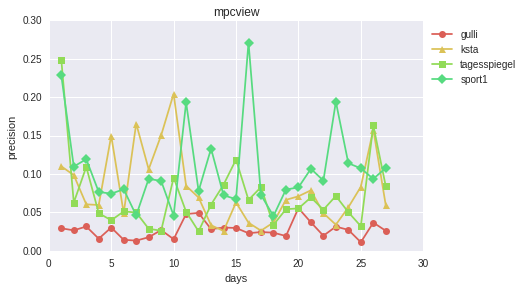

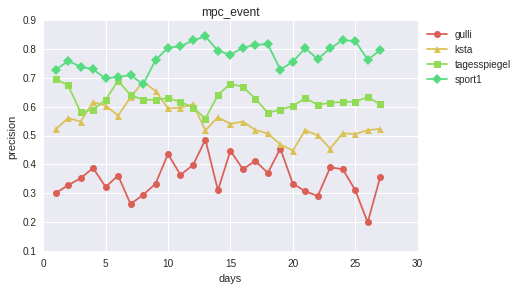

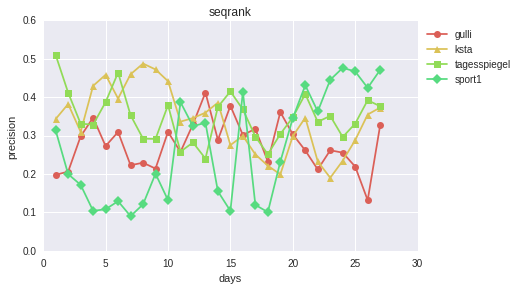

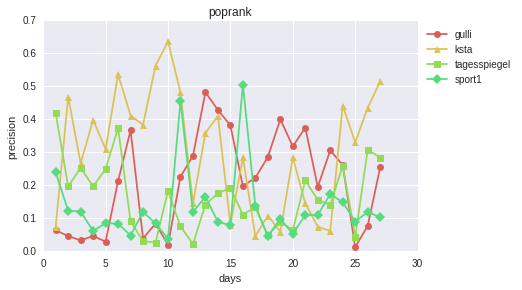

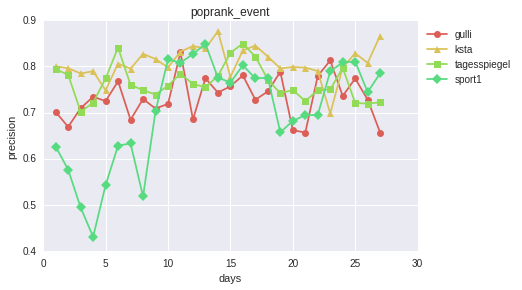

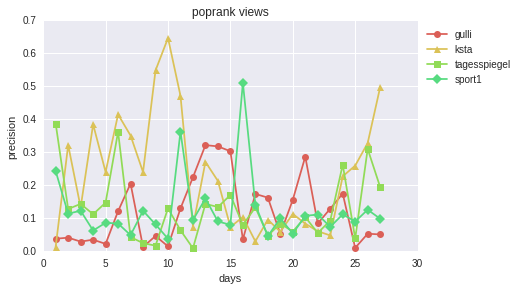

In [28]:
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    j = 0
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.65,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
        ax.plot(days, precision, marker=unfilled_markers[j])
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1.png' % ranker)
        j = j + 1

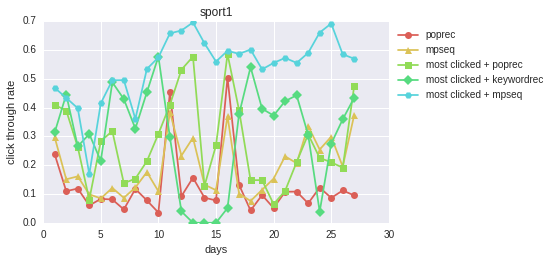

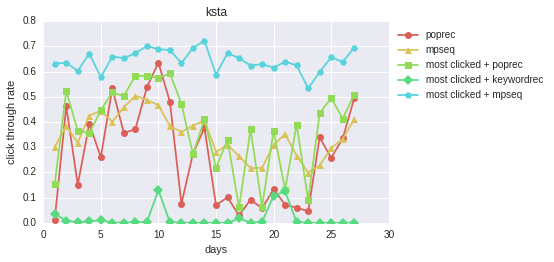

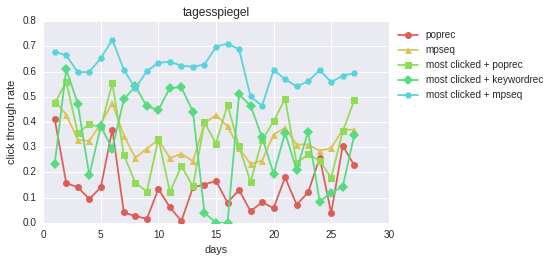

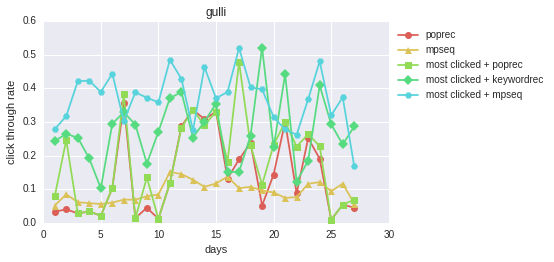

In [43]:
i=0
# newrankers = [ x for x in rankers if "session" not in x and "views" not in x]
# newrankers = [ x for x in rankers if "session" not in x]
newrankers = [ x for x in rankers]
# explore_rankers = ['popevent_popularity', 'popevent_keyword','popevent_mpcsession']
labels = []
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    j = 0
    for ranker in newrankers:
        labels.append(ranker_mapping[ranker])
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.2,0.6,0.7])
        ax.set_xlabel('days')
        ax.set_ylabel('click through rate')
        ax.plot(days, precision, marker=unfilled_markers[j])
#         ax.plot(days, precision)
        ax.legend(labels, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1

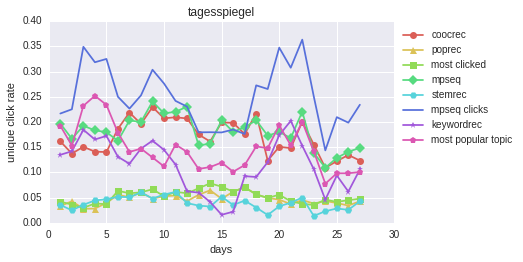

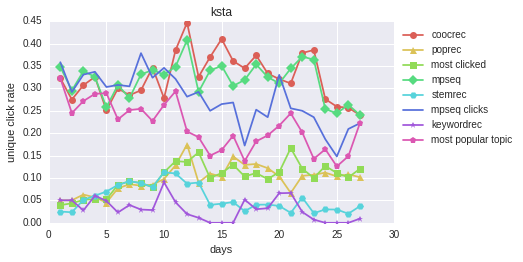

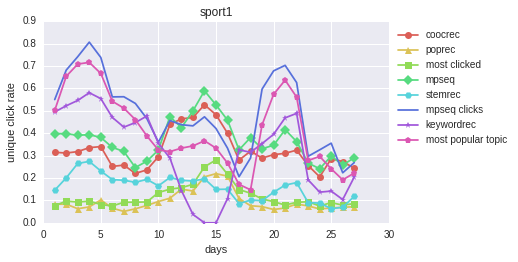

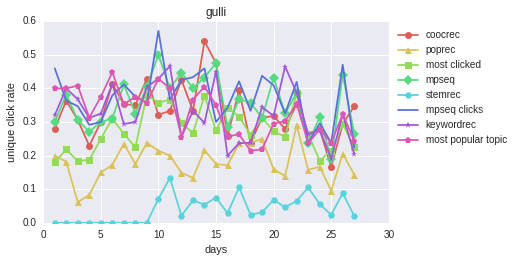

In [22]:
#recall per domain
i=0
labels = []
newrankers = [ x for x in rankers if "session" not in x and "views" not in x]
for domain in domains:
    j=0
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in newrankers:
        labels.append(ranker_mapping[ranker])
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.2,0.6,0.7])
        ax.set_xlabel('days')
        ax.set_ylabel('unique click rate')
        ax.plot(days, recall,  marker=unfilled_markers[j])
        ax.legend(labels, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1_recall.png' % domain)
        j = j +1

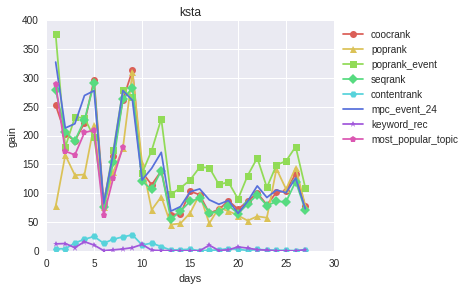

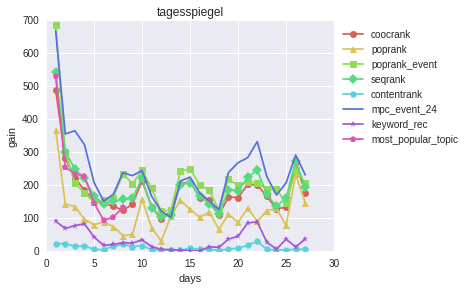

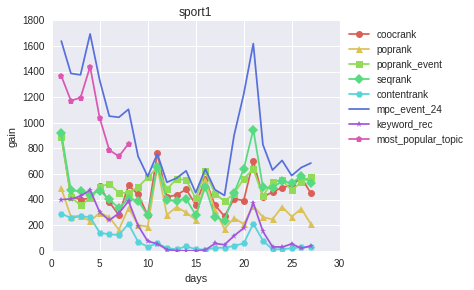

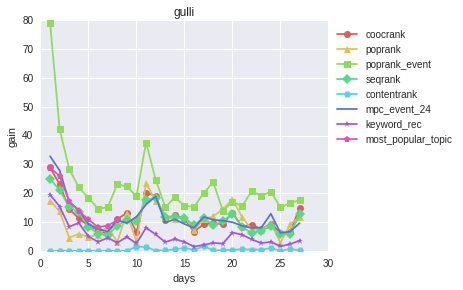

In [11]:
i=0
labels = []
newrankers = [ x for x in rankers if "session" not in x and "views" not in x]
for domain in domains:
    j=0
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in newrankers:
        labels.append(ranker_mapping[ranker])
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['cg']
        ax.set_position([0.1,0.1,0.5,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('gain')
#         ax.plot(days, precision, dashes=linestyles[j])
        ax.plot(days, precision, marker=unfilled_markers[j])
        ax.legend(newrankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1

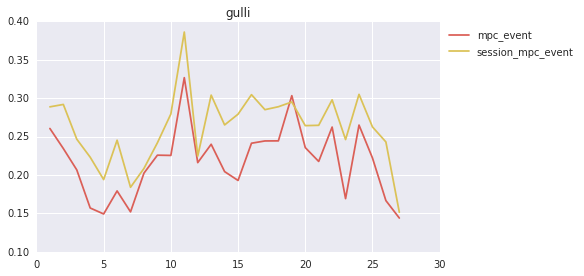

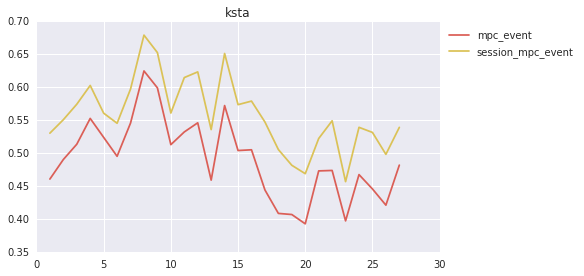

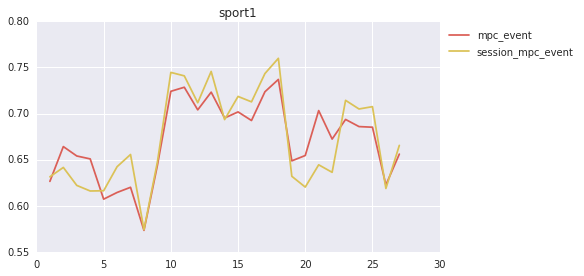

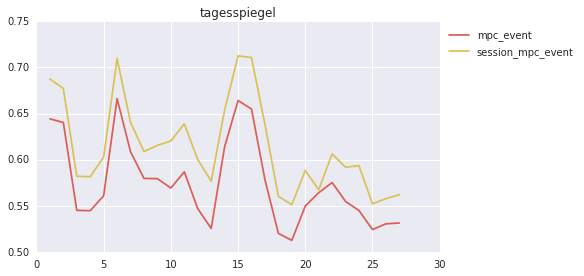

In [341]:
i=0
rankers = ['mpc_event', 'session_mpc_event']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_event_%s.png' % domain)

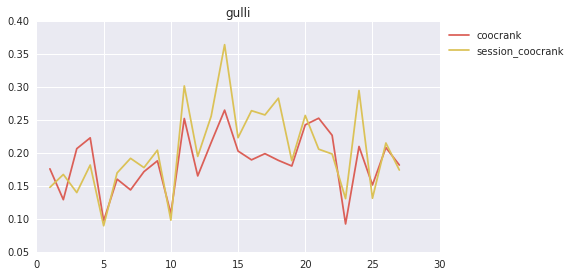

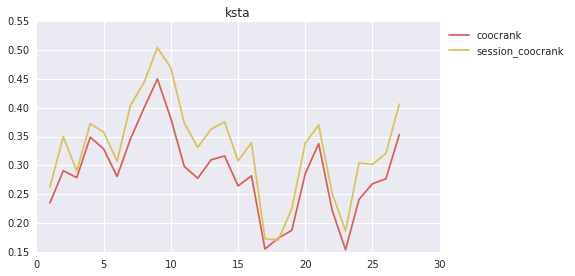

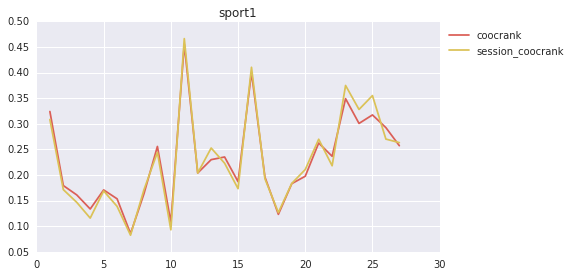

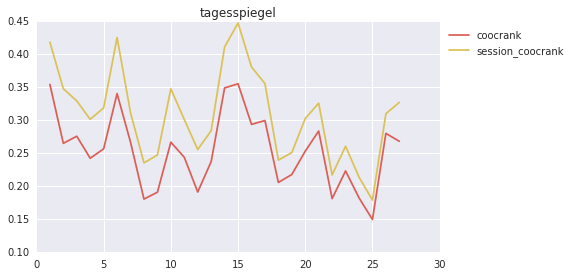

In [344]:
i=0
rankers = ['coocrank', 'session_coocrank']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_coocrank_%s.png' % domain)

In [153]:
import numpy as np
for domain in domains:
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['precision']
        print(domain_mapping[domain], ranker, np.mean(recall.values))

tagesspiegel coocrank 0.263203006578
tagesspiegel poprank 0.164719348428
tagesspiegel poprank_event 0.764793171799
tagesspiegel seqrank 0.348960524764
tagesspiegel contentrank 0.0072837319905
tagesspiegel session_coocrank 0.298248187355
tagesspiegel session_seqrank 0.400804965651
tagesspiegel session_mpc_event_0.5 0.641582201908
tagesspiegel mpc_event_24 0.62478745678
tagesspiegel mpcviews 0.0719550920633
tagesspiegel keyword_rec 0.0178620427147
tagesspiegel most_popular_topic 0.496513934759
ksta coocrank 0.314090779886
ksta poprank 0.306920012797
ksta poprank_event 0.807931757918
ksta seqrank 0.341741016447
ksta contentrank 0.0156489064072
ksta session_coocrank 0.323520109969
ksta session_seqrank 0.394563735372
ksta session_mpc_event_0.5 0.577833980214
ksta mpc_event_24 0.547908688921
ksta mpcviews 0.0804141204391
ksta keyword_rec 0.00218434084695
ksta most_popular_topic 0.499096128162
sport1 coocrank 0.217554226204
sport1 poprank 0.132301609042
sport1 poprank_event 0.704128451817
spo

In [51]:
import numpy as np
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    recall = subresults['recall']
#     print(ranker_mapping[ranker], np.mean(recall.values))
    print(ranker, np.mean(recall.values))

session_mpc_event_1 0.280345290611
session_mpc_event_0.8 0.287882177955
session_mpc_event_0.6 0.29867362402
session_mpc_event_0.5 0.304394378317
session_mpc_event_0.3 0.320381891062
session_mpc_event_0.2 0.328116795547
session_mpc_event_0.1 0.33583115552
session_mpc_event_0.0 0.340287775616


In [12]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['cg']
    print(ranker_mapping[ranker], np.mean(precision.values))

KeyError: 'session_mpc_event_1'

In [52]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['precision']
#     print(ranker_mapping[ranker], np.mean(precision.values))
    print(ranker, np.mean(precision.values))

session_mpc_event_1 0.520047175529
session_mpc_event_0.8 0.524038263778
session_mpc_event_0.6 0.527122546317
session_mpc_event_0.5 0.528093708975
session_mpc_event_0.3 0.529694131523
session_mpc_event_0.2 0.530888507176
session_mpc_event_0.1 0.531307504616
session_mpc_event_0.0 0.500515508534


In [12]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['avggain']
    print(ranker, np.mean(precision.values))

coocrank 0.0599787970663
poprank 0.0933368283291
poprank views 0.133049738514
poprank_event 0.030571357552
seqrank 0.0527490796155
contentrank 0.0913077699593
session_coocrank 0.0641298614482
session_seqrank 0.0514618363823
session_mpc_event_0.5 0.0369147335155
mpc_event_24 0.0375389147275
mpcviews 0.173959601205
keyword_rec 0.1470243521
most_popular_topic 0.0518607484121
